# Proyek Analisis Data: Bike Data Sharing Dataset
- **Nama:** Muhamad Aditya Yusuf Jatikusumo
- **Email:** yusufjana18@gmail.com
- **ID Dicoding:** muhamad_adityayusuf

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 <br>
Apakah musim mempengaruhi jumlah peminjaman sepeda?
- Pertanyaan 2 <br>
Bagaimana kinerja peminjaman sepeda per bulan?

Pada Analisis data kali ini akan digunakan dataset bike data sharing dan file csv yang digunakan yaitu day.csv walaupun file hour.csv akan digunakan untuk menentukan arah dari analisis data yang diinginkan

## Import Semua Packages/Library yang Digunakan

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling
Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data
Tahap ini untuk mengimport data dari format csv ke bentuk dataframe menggunakan library pandas dan sebagai tahap awal dari analisis data. 

Proses yang dilakukan:
1. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [37]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

In [38]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [39]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [40]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [41]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1


In [42]:
# Untuk mempermudah analisis
# digunakan kolom 'dteday' sebagai index dari dataframe dan berfungsi sebagai waktu
# Keterangan Warna:
"""
- Warna Hitam: Tidak ada data
- Warna Putih: Ada data
"""
day_df.head().style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [43]:
hour_df.head().style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


### Assessing Data
Pemeriksaan data ini dilakukan dengan menjalankan proses assessing data. Ia merupakan proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [44]:
# Mengecek apakah ada data yang hilang pada dataset dan tipe data dari masing-masing kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
# Mengecek kolom dari dataset
day_df.iloc[5]

instant                6
dteday        2011-01-06
season                 1
yr                     0
mnth                   1
holiday                0
weekday                4
workingday             1
weathersit             1
temp                0.20
atemp               0.23
hum                 0.52
windspeed           0.09
casual                88
registered          1518
cnt                 1606
Name: 5, dtype: object

In [46]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
hour_df.iloc[5]

instant                6
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     5
holiday                0
weekday                6
workingday             0
weathersit             2
temp                0.24
atemp               0.26
hum                 0.75
windspeed           0.09
casual                 0
registered             1
cnt                    1
Name: 5, dtype: object

In [48]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.00,NaN,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,NaN,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,NaN,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,NaN,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,NaN,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00


In [49]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.00,NaN,2.50,0.50,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,NaN,1.11,0.50,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,NaN,2.00,0.00,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,NaN,3.00,1.00,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,NaN,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00


In [50]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


### Cleaning Data
pada tahap ini, kita akan membuat rancangan tahapan serta metode pembersihan data berdasarkan masalah yang ditemukan dalam proses assessing data. Hal ini dapat dijadikan sebagai dokumentasi untuk memastikan orang lain memahami setiap tahapan dalam pembersihan data yang akan kita lakukan.

Tahap ini bertujuan untuk mengubah tipe variabel dari dteday dari object ke datetime, karena variabel tersebut adalah variabel time series.

In [51]:
print("Total duplikasi data: ", day_df.duplicated().sum())

Total duplikasi data:  0


In [52]:
print("Total duplikasi data: ", hour_df.duplicated().sum())

Total duplikasi data:  0


In [53]:
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [55]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [56]:
day_df.rename(columns={'mnth':'month','hum':'humidity','cnt':'total_count'},inplace=True)
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count'],
      dtype='object')

Data sudah bersih maka lanjut ke tahap berikutnya.

## Exploratory Data Analysis (EDA)
EDA merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Pada prosesnya, kita akan sering menggunakan berbagai teknik dan parameter dalam descriptive statistics yang bertujuan untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah. Selain itu, tidak jarang kita juga menggunakan visualisasi data untuk menemukan pola dan memvalidasi parameter descriptive statistics yang diperoleh.

### Explore Data (Pengaruh hari dalam peminjaman sepeda)
Tahap ini dilakukan untuk menganalisis apakah terdapat pengaruh dari jenis hari tertentu terhadap volume peminjaman sepeda. Berdasarkan hasil output, terdapat indikasi bahwa peminjaman sepeda cenderung tinggi pada hari-hari kerja, sementara pada akhir pekan dan tanggal merah cenderung lebih rendah.

In [57]:
df = day_df.copy() # mengcopy day_df ke df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   yr           731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total_count  731 non-null    int64         
dtypes: datet

In [58]:
# Mapping data yang bertipe kategorikal
df['holiday'] = df['holiday'].map({0: 'Tidak', 1: 'Ya'})
df['weekday'] = df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
df['workingday'] = df['workingday'].map({0: 'Tidak', 1: 'Ya'})
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})
df['weathersit'] = df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})
df['season'] = df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})
month_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
df['month'] = pd.Categorical(df['month'].map(month_map), categories=month_map.values(), ordered=True)

In [59]:
df.head(5)

,instant,dteday,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Semi,2011,Januari,Tidak,Sabtu,Tidak,Berkabut,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,Semi,2011,Januari,Tidak,Minggu,Tidak,Berkabut,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,Semi,2011,Januari,Tidak,Senin,Ya,Cerah,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,Tidak,Selasa,Ya,Cerah,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,Tidak,Rabu,Ya,Cerah,0.23,0.23,0.44,0.19,82,1518,1600


In [60]:
# Pada bagian ini akan dilakukan analisis data untuk melihat kolom-kolom dengan berbagai kategori
def grab_col_names(dataframe, cat_th=13, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    binary_cols = [col for col in cat_cols if dataframe[col].nunique()==2]

    only_cat_cols = list(set(cat_cols)-set(binary_cols))

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'num_cols: {len(num_cols)}')
    print(f'only_cat_cols: {len(only_cat_cols)}')
    print(f'binary_cols: {len(binary_cols)}')
    return only_cat_cols, num_cols, binary_cols

only_cat_cols, num_cols, binary_cols = grab_col_names(df)

Observations: 731
Variables: 16
num_cols: 9
only_cat_cols: 4
binary_cols: 3


In [61]:
# Melihat kolom-kolom dengan berbagai kategori
print(f'Numerical Variable: {num_cols}')
print(f'Categorical Variable: {only_cat_cols}')
print(f'Binary Variable: {binary_cols}')

Numerical Variable: ['instant', 'dteday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
Categorical Variable: ['month', 'weekday', 'season', 'weathersit']
Binary Variable: ['yr', 'holiday', 'workingday']


In [62]:
weathersit_order = ['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat']
season_order = ['Semi', 'Panas', 'Gugur', 'Dingin']

In [63]:
#  Membuat pivot tabel untuk rata-rata jumlah peminjaman sepeda terhadap variabel kategorikal hari
#  Hal ini dilakukan untuk melihat bagaimana variabel kategorikal mempengaruhi jumlah peminjaman sepeda
#  Menggunakan groupby dan agg untuk menghitung rata-rata jumlah peminjaman sepeda
pivot_holiday = df.groupby(by=["holiday"]).agg({
    "total_count": "mean"
}).reset_index()
pivot_weekday = df.groupby(by=["weekday"]).agg({
    "total_count": "mean"
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()
pivot_workingday = df.groupby(by=["workingday"]).agg({
    "total_count": "mean"
}).reset_index()
pivot_weathersit = df.groupby(by=["weathersit"]).agg({
    "total_count": "mean"
}).reindex(weathersit_order, fill_value=0).reset_index()
pivot_season = df.groupby(by=["season"]).agg({
    "total_count": "mean"
}).reindex(season_order, fill_value=0).reset_index()

# Display pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :")
print(pivot_weathersit.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap musim :")
print(pivot_season.to_string(index=False))

pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :
  weathersit  total_count
       Cerah      4876.79
    Berkabut      4035.86
Hujan Ringan      1803.29
 Hujan Lebat         0.00


Rata-rata jumlah peminjaman sepeda terhadap musim :
season  total_count
  Semi      2604.13
 Panas      4992.33
 Gugur      5644.30
Dingin      4728.16
Rata-rata jumlah peminjaman sepeda terhadap hari libur :
holiday  total_count
  Tidak      4527.10
     Ya      3735.00


Rata-rata jumlah peminjaman sepeda terhadap hari :
weekday  total_count
  Senin      4338.12
 Selasa      4510.66
   Rabu      4548.54
  Kamis      4667.26
  Jumat      4690.29
  Sabtu      4550.54
 Minggu      4228.83


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
workingday  total_count
     Tidak      4330.17
        Ya      4584.82


In [64]:
# Menghitung rata-rata dari kedua variabel
overall_avg_casual = df['casual'].mean()
overall_avg_registered = df['registered'].mean()

# Membuat DataFrame baru untuk hasil rata-rata
data = {'Variabel': ['Casual', 'Registered'],
        'Rata-rata': [overall_avg_casual, overall_avg_registered]}
pivot_table_overall = pd.DataFrame(data)

# Menampilkan pivot tabel
print("Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari dari pengguna biasa dan terdaftar :")
print(pivot_table_overall.to_string(index=False))

Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari dari pengguna biasa dan terdaftar :
  Variabel  Rata-rata
    Casual     848.18
Registered    3656.17


In [71]:
# Menghitung korelasi untuk setiap variabel
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()

# Menamplikan plot korelasi
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, fmt=".2f", linewidths=1, linecolor='black')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Semi'

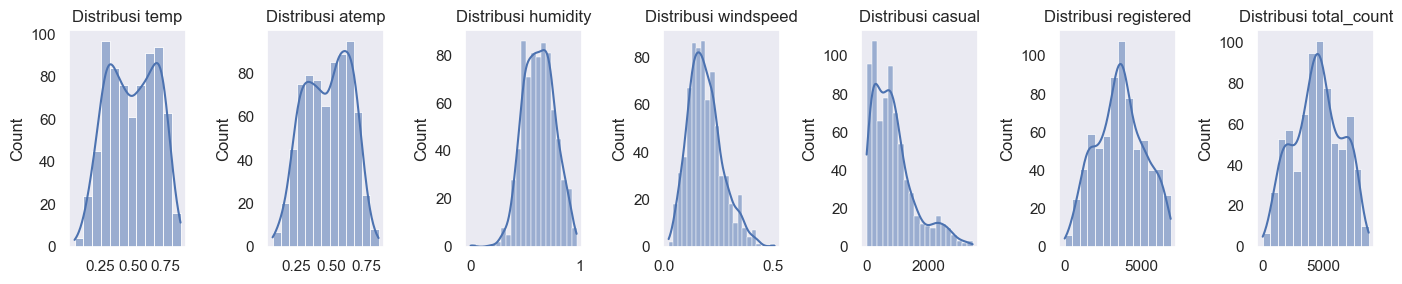

In [66]:
# Membuat plot distribusi untuk setiap kolom 
# yang akan digunakan untuk melihat distribusi dari setiap variabel
# Pada kasus ini, kita akan menggunakan sns.histplot untuk membuat plot distribusi
# Menggunakakan kolom 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count'
# untuk membuat plot distribusi
columns_to_plot = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']

# Mengatur ukuran plot dan layout subplot
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop melalui setiap kolom dan membuat plot distribusi
# Menggunakan sns.histplot untuk membuat plot distribusi
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel('')

# Menampilkan semua plot dalam satu output
plt.tight_layout()
plt.show()

In [67]:
df.head()

,instant,dteday,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Semi,2011,Januari,Tidak,Sabtu,Tidak,Berkabut,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,Semi,2011,Januari,Tidak,Minggu,Tidak,Berkabut,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,Semi,2011,Januari,Tidak,Senin,Ya,Cerah,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,Tidak,Selasa,Ya,Cerah,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,Tidak,Rabu,Ya,Cerah,0.23,0.23,0.44,0.19,82,1518,1600


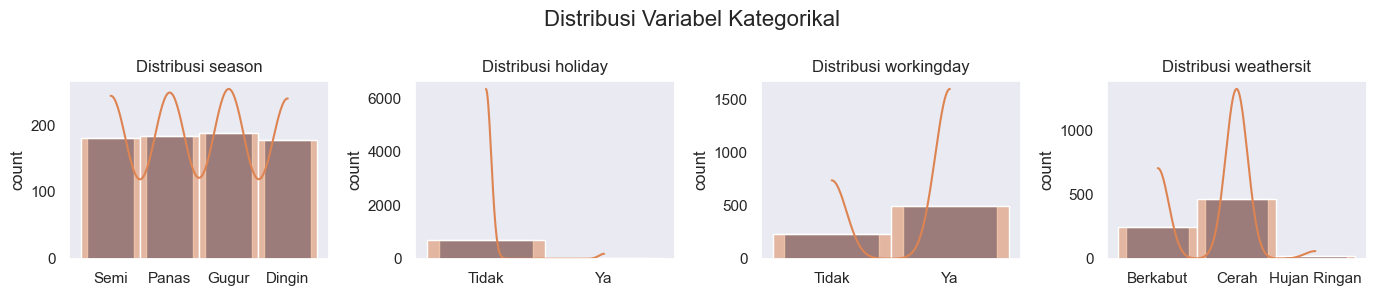

In [73]:
# Membuat plot distribusi untuk variabel kategorikal
# yang akan digunakan untuk melihat distribusi dari setiap variabel kategorikal
# Pada kasus ini, variabel kategorikal yang akan digunakan adalah season, holiday, workingday, dan weathersit
columns_to_plot = ['season', 'holiday', 'workingday', 'weathersit']

# Mengatur ukuran plot dan layout subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribusi Variabel Kategorikal', fontsize=16)

# Loop melalui setiap kolom dan membuat plot distribusi
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i])
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel('')

# Menampilkan semua plot dalam satu output
plt.tight_layout()
plt.show()


Hasil dari plot distribusi untuk variabel kategorikal akan digunakan untuk melihat distribusi dari setiap variabel kategorikal Pada kasus ini, variabel kategorikal yang akan digunakan adalah season, holiday, workingday, dan weathersit dan dapat dilihat bahwa variabel kategorikal memiliki distribusi yang merata 

In [69]:
# Untuk mengconvert kembali ke csv yang akan digunakan untuk streamlit
df.to_csv('./data/main.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 <br>
Apakah musim mempengaruhi jumlah peminjaman sepeda?



Tahap ini menampikan stacked barchart berdasarkan musim tiap tahunnya. terlihat bahwa musim gugur menjadi musim yang memiliki jumlah peminjam paling banyak. <br> <br>


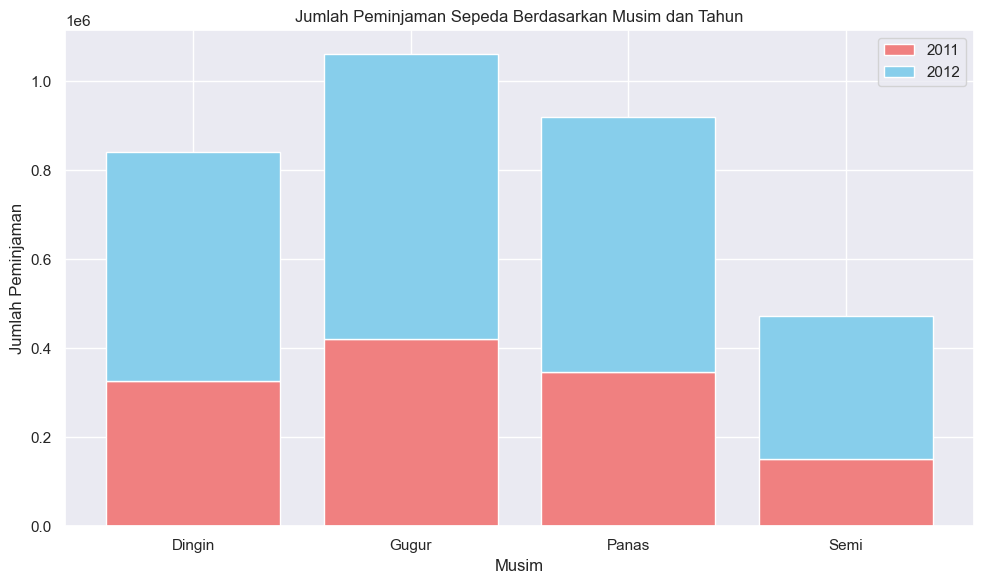

In [87]:
# Menghitung jumlah total peminjaman untuk setiap kombinasi musim dan tahun
pivot_season_year = df.groupby(['season', 'yr'])['total_count'].sum().reset_index()
x = np.arange(len(pivot_season_year['season'].unique()))
y1 = pivot_season_year[pivot_season_year['yr'] == '2011']['total_count']
y2 = pivot_season_year[pivot_season_year['yr'] == '2012']['total_count']

# Membuat plot stacked barchart
plt.figure(figsize=(10, 6))
plt.bar(x, y1, label='2011', color='lightcoral')
plt.bar(x, y2, bottom=y1, label='2012', color='skyblue')


plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim dan Tahun')
plt.xticks(x, pivot_season_year['season'].unique())
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()



Dapat dilihat bahwa jumlah peminjaman sepeda meningkat dari tahun 2011 ke tahun 2012 untuk setiap musim

### Pertanyaan 2:
Bagaimana kinerja peminjaman sepeda per bulan?

Tahap ini memiliki 2 step, yaitu membuat cluster dan memvisualisasikannya. pada step pertama, akan dibuat pengelompokkan banyaknya hari peminjaman berdasarkan bulan menjadi 3 bagian, yaitu sedikit, sedang, dan banyak. Metode clustering sederhana ini dilakukan secara manual. Cluster akan dibuat dengan pembagian jumlah peminjaman menjadi 3 bagian yang sama rata berdasarkan nilai maksimum dan minimum dari variabel total_count.

In [89]:
# Mendapatkan nilai minimum dan maksimum dan membagi data menjadi 3 bagian
min_total = df['total_count'].min()
max_total = df['total_count'].max()
bins = [min_total, min_total + (max_total - min_total) / 3, min_total + 2 * (max_total - min_total) / 3, max_total]

labels = ['Sedikit', 'Sedang', 'Banyak']
df['cluster'] = pd.cut(df['total_count'], bins=bins, labels=labels)

# Menghitung frekuensi masing-masing kombinasi mnth (bulan) dan cluster
result = df.groupby(['month', 'cluster']).size().unstack(fill_value=0)

print(result)

cluster    Sedikit  Sedang  Banyak
month                             
Januari         43      19       0
Februari        34      23       0
Maret           29      21      12
April           12      29      19
Mei              2      37      23
Juni             0      35      25
Juli             0      34      28
Agustus          1      33      28
September        4      28      28
Oktober          8      30      23
November        10      44       6
Desember        23      37       2


In [85]:
# Plotting garis untuk masing-masing cluster
plt.figure(figsize=(10, 6))
rng = range(len(result.index))
plt.plot(rng, result['Sedikit'], label='Sedikit', marker='o', color='skyblue')
plt.plot(rng, result['Sedang'], label='Sedang', marker='o', color='salmon')
plt.plot(rng, result['Banyak'], label='Banyak', marker='o', color='teal')

# Menampilkan plot
plt.xlabel('')
plt.ylabel('Jumlah Hari')
plt.title('Pengelompokkan Berdasarkan Jumlah Peminjaman Sepeda per Bulan')
bar_width = 1
plt.xticks([r + bar_width for r in range(len(result.index))], result.index, rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'result' is not defined

<Figure size 1000x600 with 0 Axes>

## Conclusion

 - **Apakah musim mempengaruhi peminjaman sepeda?** <br>
    Berdasarkan analisis stacked bar chart mengenai jumlah peminjaman sepeda berdasarkan musim tiap tahunnya, dapat diamati bahwa musim gugur menjadi musim yang paling diminati oleh para peminjam, dengan jumlah peminjaman melebihi 1 juta selama periode 2011-2012. Kondisi ini berbeda dengan musim semi yang hanya mencapai sekitar 500 ribu peminjaman selama dua tahun tersebut. Sementara itu, peminjaman pada musim dingin dan panas berada dalam kisaran 800-900 ribu. Selain itu, perlu diperhatikan bahwa jumlah peminjaman pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan dengan tahun 2011 untuk semua musim. Dengan demikian, dapat disimpulkan bahwa musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Pemahaman terhadap pola ini dapat menjadi dasar strategi peningkatan layanan dan promosi pada musim-musim tertentu guna meningkatkan minat peminjam.
 - **Bagaimana kinerja peminjaman sepeda per bulan?** <br>
    Melalui analisis kinerja peminjaman sepeda setiap bulan yang telah diklasifikasikan ke dalam cluster "Sedikit", "Sedang", dan "Banyak", terlihat bahwa setiap bulan menunjukkan pola peminjaman yang berbeda. Misalnya, bulan Juni, Juli, dan Agustus cenderung memiliki jumlah peminjaman yang tinggi dan termasuk dalam cluster "Banyak", sementara bulan Januari, Februari, dan Maret cenderung memiliki jumlah peminjaman yang lebih rendah dan masuk ke dalam cluster "Sedikit". Kenaikan jumlah peminjaman teramati pada bulan-bulan dengan suhu lebih hangat, seperti Mei hingga Agustus, sementara penurunan peminjaman terjadi pada bulan-bulan dengan suhu yang lebih sejuk. Informasi ini dapat membantu dalam perencanaan layanan dan manajemen stok sepeda untuk mengakomodasi fluktuasi permintaan setiap bulan.  